Traversal Path: ['S', 'A', 'B', 'C', 'D', 'G']
Solution Path: ['S', 'B', 'G']


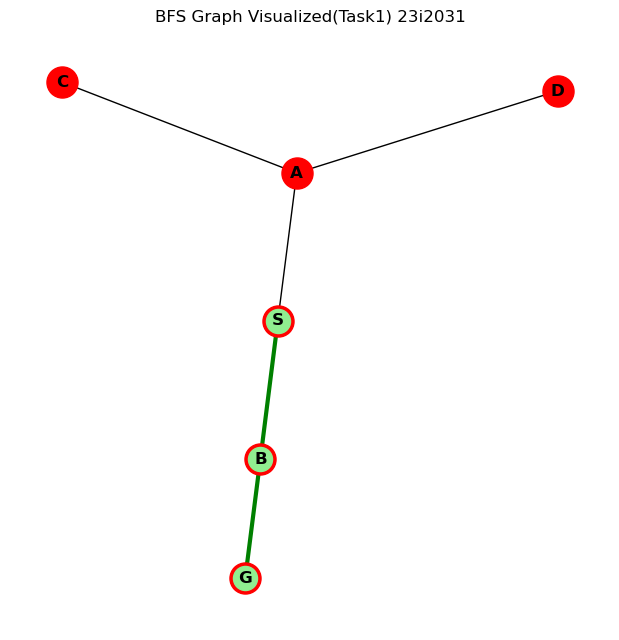

In [41]:
#Task1
from collections import deque
import networkx as nx
import matplotlib.pyplot as plt

graph = {
    'S': ['A', 'B'],
    'A': ['C', 'D'],
    'C': [],
    'D': [],
    'B': ['G'],
    'G': []
}

def bfs(graph, start, goal):
    frontier = deque()
    frontier.append(start)

    visited = set()
    parent = {}         
    traversal_path = []
    while frontier:
            current = frontier.popleft()
            traversal_path.append(current)
            
            if current == goal:
                break
    
            if current not in visited:
                visited.add(current)
    
                for neighbor in graph[current]:
                    if neighbor not in visited and neighbor not in frontier:
                        parent[neighbor] = current
                        frontier.append(neighbor)

    solution_path = []
    node = goal
    while node != start:
        solution_path.append(node)
        node = parent.get(node)
        if node is None:
            return traversal_path, None  
    solution_path.append(start)
    solution_path.reverse()

    return traversal_path, solution_path


start_state = 'S'
goal_state = 'G'

traversal, solution = bfs(graph, start_state, goal_state)

print("Traversal Path:", traversal)
print("Solution Path:", solution)


def visualize_bfs(graph, solution_path):
    G = nx.Graph(graph)
    pos = nx.spring_layout(G)
    
    plt.figure(figsize=(6, 6))
    
    nx.draw(G, pos, with_labels=True, node_color='red', 
            node_size=500, arrowsize=10, font_weight='bold')
    
    if solution_path:
        edges = [(solution_path[i], solution_path[i+1]) for i in range(len(solution_path)-1)]
        nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color='green', width=3)
        nx.draw_networkx_nodes(G, pos, nodelist=solution_path, node_color='lightgreen')

    plt.title("BFS Graph Visualized(Task1) 23i2031")
    plt.show()

visualize_bfs(graph, solution)
    


Part 1
Visiting:  S
Visiting:  A
Visiting:  B
Visiting:  C
Path:  S A C
Part 2
Visiting:  S
Visiting:  A
Visiting:  B
Visiting:  C
Path:  S A C
Part 3
Visiting:  S
Visiting:  A
Visiting:  B
Visiting:  C
Path:  S A C


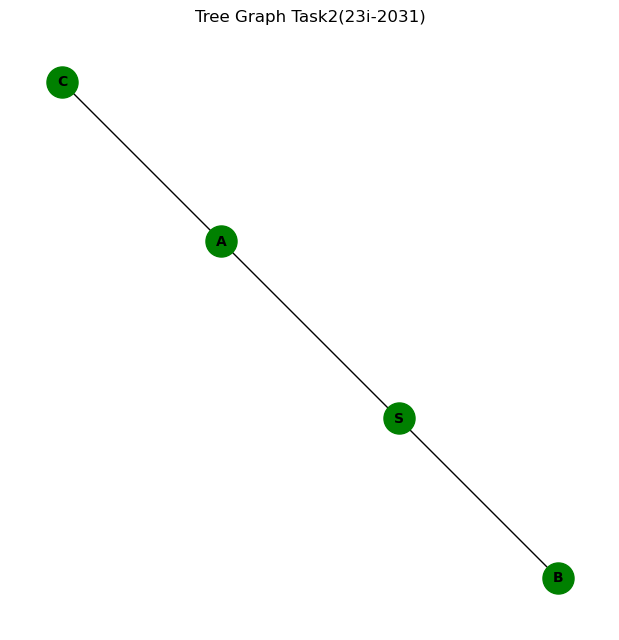

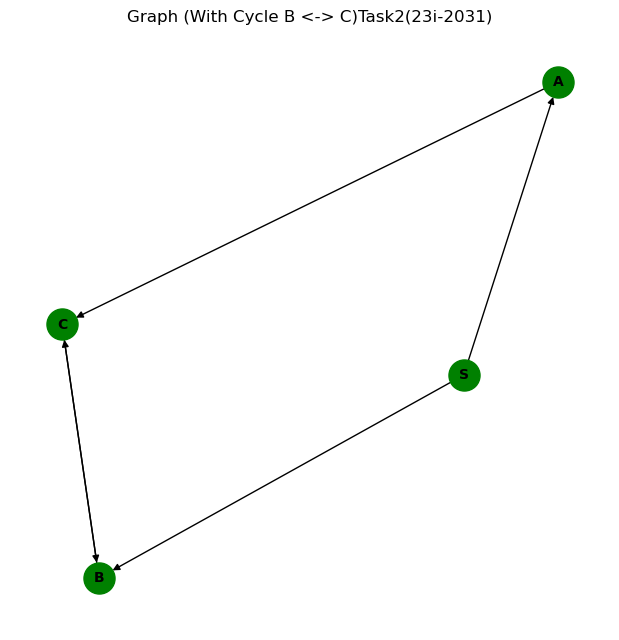

In [56]:
#Task2
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque
tree={
    'S':['A','B'],
    'A':['C'],
    'B':[],
    'C':[]
}

graph={
    'S':['A','B'],
    'A':['C'],
    'B':['C'],
    'C':['B']
}
start_state = 'S'
goal_state = 'C'

#part 1 non visited bfs on tree
print("Part 1")
def bfsTreeNonvisited(start, goal):
    queue = deque([[start]])

    while queue:
        path = queue.popleft()
        node = path[-1]

        print("Visiting: ", node)

        if node == goal:
            print("Path: ", " ".join(path))
            return

        for neighbor in tree[node]:
            new_path = list(path)
            new_path.append(neighbor)
            queue.append(new_path)

bfsTreeNonvisited(start_state, goal_state)

print("Part 2")
#part 2 bfs on graph non visited
def bfsNonvisitedGraph(start, goal):
    queue = deque([[start]])

    while queue:
        path = queue.popleft()
        node = path[-1]

        print("Visiting: ", node)

        if node == goal:
            print("Path: ", " ".join(path))
            return

        for neighbor in graph[node]:
            new_path = list(path)
            new_path.append(neighbor)
            queue.append(new_path)

bfsNonvisitedGraph(start_state, goal_state)

print("Part 3")
#Part3 bfs visited grapgh
def bfsVistedGraph(start, goal):
    queue = deque([[start]])
    visited = set()

    while queue:
        path = queue.popleft()
        node = path[-1]

        if node in visited:
            print("Skipped ", node, "(already visited)")
            continue

        print("Visiting: ", node)
        visited.add(node)

        if node == goal:
            print("Path: ", " ".join(path))
            return

        for neighbor in graph[node]:
            new_path = list(path)
            new_path.append(neighbor)
            queue.append(new_path)

bfsVistedGraph(start_state, goal_state)

plt.figure(figsize=(6, 6))

G_tree = nx.Graph()

for parent in tree:
    for child in tree[parent]:
        G_tree.add_edge(parent, child)

pos_tree = nx.spring_layout(G_tree, seed=42)

nx.draw(G_tree, pos_tree, with_labels=True, node_color="green", node_size=500, font_size=10, font_weight="bold", arrows=True)

plt.title("Tree Graph Task2(23i-2031)")
plt.show()


plt.figure(figsize=(6, 6))

G_graph = nx.DiGraph()

for parent in graph:
    for child in graph[parent]:
        G_graph.add_edge(parent, child)

pos_graph = nx.spring_layout(G_graph, seed=42)

nx.draw(G_graph, pos_graph, with_labels=True, node_color="green", node_size=500, font_size=10, font_weight="bold", arrows=True)

plt.title("Graph (With Cycle B <-> C)Task2(23i-2031)")
plt.show()


DFS Path ['S', 'A', 'B', 'G']


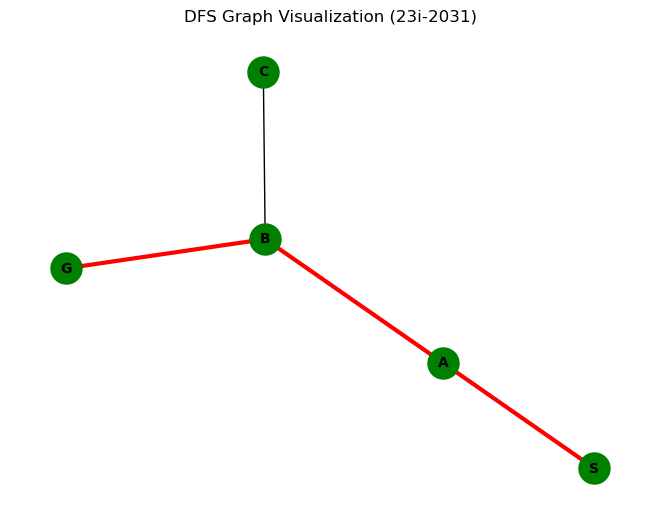

In [51]:
#Task3
import networkx as nx
import matplotlib.pyplot as plt

graph = {
    'S':['A'],
    'A':['B'],
    'B':['C','G'],
    'C':[],
    'G':[]
}

start_state = 'S'
goal_state = 'G'

def dfs(graph, start, goal):
    visited = set()
    stack = [(start, [start])]
    traversal_order = []

    while stack:
        node, path = stack.pop()
        if node not in visited:
            visited.add(node)
            traversal_order.append(node)

            if node == goal:
                return path, traversal_order

            for neighbor in reversed(graph.get(node, [])):
                if neighbor not in visited:
                    stack.append((neighbor, path + [neighbor]))

    return None, traversal_order

path, order = dfs(graph, start_state, goal_state)
print("DFS Path", path)

G = nx.Graph()

for node in graph:
    for neighbor in graph[node]:
        G.add_edge(node, neighbor)

pos = nx.spring_layout(G)

nx.draw(G, pos, with_labels=True, node_color='green', 
        node_size=500, font_size=10, font_weight='bold', arrows=True)

if path:
    path_edges = list(zip(path, path[1:]))
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=3)

plt.title("DFS Graph Visualization (23i-2031)")

plt.show()

Optimal Path: ['S', 'A', 'G']
Total Cost: 3


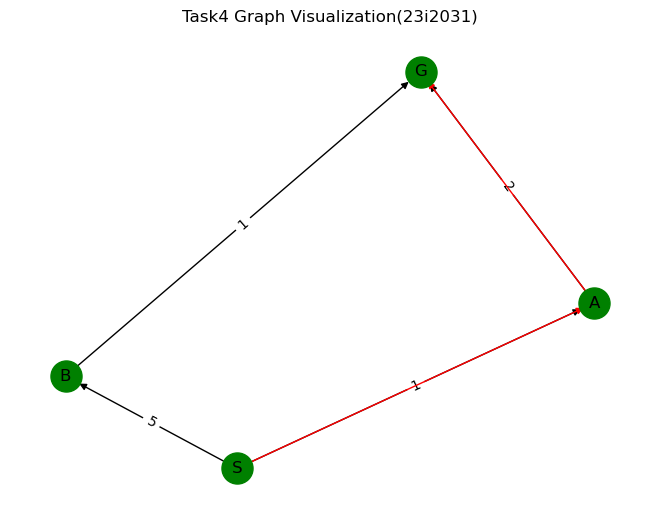

In [49]:
#Task4
import networkx as nx
import matplotlib.pyplot as plt
import heapq
graph = {
    'S': [('A', 1), ('B', 5)],
    'A': [('G', 2)],
    'B': [('G', 1)],
    'G': []
}

start = 'S'
goal = 'G'

def uniformCostSearch(graph, start, goal):
    priority_queue = []
    heapq.heappush(priority_queue, (0, start, [start]))  

    visited = {}

    while priority_queue:
        cost,current,path= heapq.heappop(priority_queue)
        
        if current==goal:
            return path,cost

        if ((current not in visited) or (cost < visited[current])):
            visited[current]=cost

            for neighbor,edge_cost in graph[current]:
                new_cost = cost + edge_cost
                heapq.heappush(priority_queue, (new_cost, neighbor, path + [neighbor]))

    return None
path, cost = uniformCostSearch(graph, start, goal)

print("Optimal Path:", path)
print("Total Cost:", cost)


G = nx.DiGraph()

for node in graph:
    for neighbor, weight in graph[node]:
        G.add_edge(node, neighbor, weight=weight)

pos = nx.spring_layout(G)

nx.draw(G, pos, with_labels=True, node_size=500, node_color='green')

edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

if path:
    path_edges = list(zip(path, path[1:]))
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=1)

plt.title("Task4 Graph Visualization(23i2031)")
plt.show()
